# Gaussian Mixture Models from scratch

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')

### 1. Data generation
Let's generate some data first, we'll sample data from two Gaussians:

$\mathcal{N}_0(0, 1)$ and $\mathcal{N}_1(5, 1)$ with mixing coefficients $\pi_0 = 0.8$ and $\pi_1 = 0.2$.

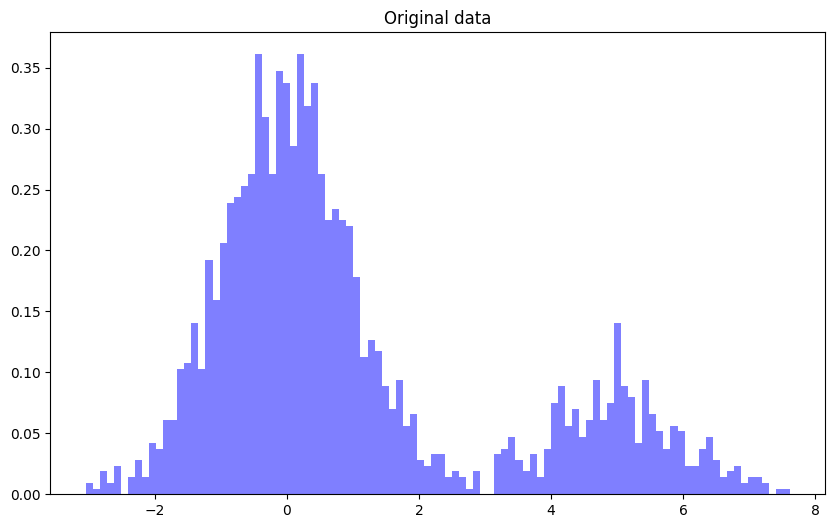

In [54]:
# Step 1: Generate synthetic data (for demonstration, let's assume this is our input data)
np.random.seed(0)  
data = np.concatenate([np.random.normal(0, 1, 1600), np.random.normal(5, 1, 400)])

# Plot the original data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='blue', alpha=0.5, density=True, label='Original Data')
plt.title("Original data")
plt.show()

### 2.Create model functions
Our job is now to recover all the above parameters. Let's first start with initialising the parameters:

In [60]:
def initialise_params(nr_components: int) -> tuple[np.array, np.array, np.array]:
    # TODO: Initialise all model parameters, that is means, variances and mixing coefficients
    pass

We need to calculate the log-likelihood to check for convergence and potential model comparisons, let's implement this. Recall the form of the log-likelihood:

$$
\log L(\Theta | X) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)
$$

In [ ]:
def compute_log_likelihood(data: np.array, means: np.array, variances: np.array, mixing_coefficients: np.array) -> float:
    # TODO: Compute log likelihood for the full dataset
    pass

First, we do the E step to calculate the responsibilities. Recall how we calculate the responsibility for a sample and corresponding mixture component:

$$
\gamma(z_{ik}) = \frac{\pi_k \cdot \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \cdot \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$

In [ ]:
def perform_e_step(data: np.array, means: np.array, variances: np.array, mixing_coefficients: np.array, responsibilities: np.array) -> np.array:
    # TODO: Implement E step
    pass

The next step is to implement the maximisation step to update our parameters given the newly calculated responsibilities:
$$
\mu_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik}) x_i}{\sum_{i=1}^{N} \gamma(z_{ik})}
$$

$$
\Sigma_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik}) (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} \gamma(z_{ik})}
$$

$$
\pi_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik})}{N}
$$


In [ ]:
def perform_m_step(data: np.array, means: np.array, variances: np.array, mixing_coefficients: np.array, responsibilities: np.array) -> tuple[np.array, np.array, np.array]:
    # TODO: Implement M step
    pass

### 3. Implement training loop
Now let's tie it all together, implement the full training loop which:
1. Initialises all parameters
2. For every iteration, calculate E & M step
3. Calculate new log-likelihood and check for convergence

In [ ]:
# TODO: Initialise all arrays here (parameters & responsibilities)
means, variances, mixing_coefficients = initialise_params()

# TODO: Implement training loop with convergence check
convergence_threshold = 1e-3

# Should end up with a log-likelihood ~ -28522

### 4. Validate model output
Let's see how the model parameters look like and if they fit the data well.

Remember, these were the original parameters $\mathcal{N}_0(0, 1)$ and $\mathcal{N}_1(5, 1)$ with mixing coefficients $\pi_0 = 0.8$ and $\pi_1 = 0.2$.

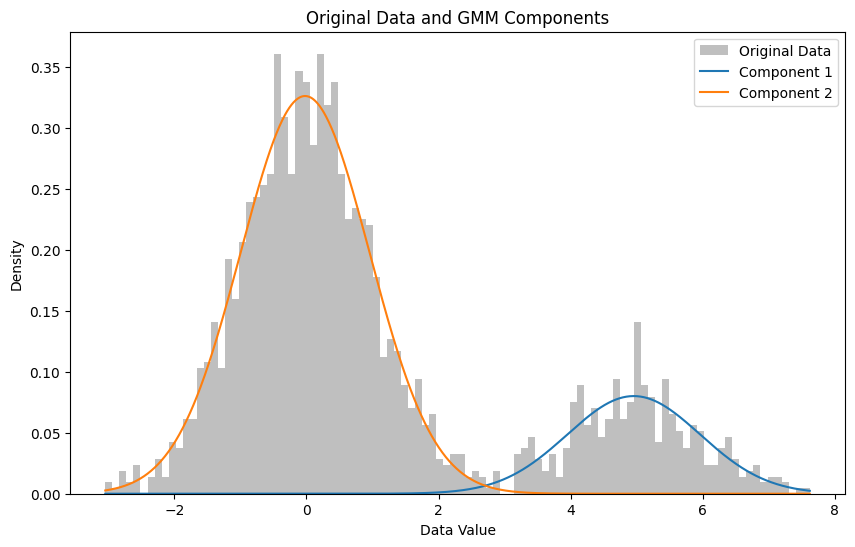

Means: [ 4.95492782 -0.02067855], Variances [1.01162842 0.95236908], Mixing coefficients: [0.20195703 0.79804297]


In [57]:
# Plotting the generated data and model parameters
plt.figure(figsize=(10, 6))

# Plot the original data
plt.hist(data, bins=100, color='gray', alpha=0.5, density=True, label='Original Data')

# Plot the model distributions
x_range = np.linspace(np.min(data), np.max(data), 1000)
for i in range(n_components):
    pdf = norm(means[i], np.sqrt(variances[i])).pdf(x_range)
    plt.plot(x_range, pdf * mixing_coefficients[i], label=f'Component {i+1}')

plt.legend()
plt.title('Original Data and GMM Components')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()
print(f"Means: {means}, Variances {variances}, Mixing coefficients: {mixing_coefficients}")

### 5. Sample from trained model
Lastly, implement sampling from the trained model 

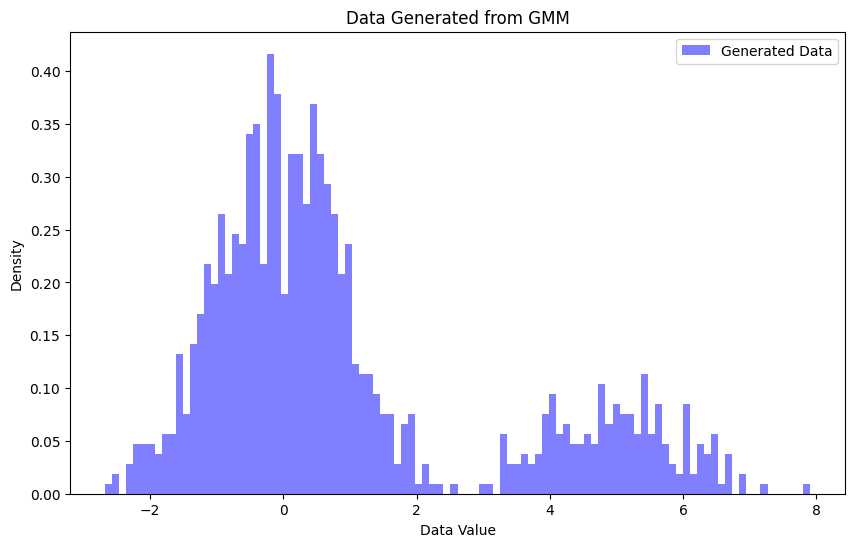

In [53]:
# Generating new data based on the model parameters
new_data_samples = []
# TODO: Generate samples from the trained model

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.hist(new_data_samples, bins=100, color='blue', alpha=0.5, density=True, label='Generated Data')
plt.legend()
plt.title('Data Generated from GMM')
plt.xlabel('Data Value')
plt.ylabel('Density')
plt.show()